In [12]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# For data preprocessing and SVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving mushroom.csv to mushroom (1).csv


In [15]:
df = pd.read_csv("mushroom.csv")

In [16]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [17]:
# Step 2: Exploratory data analysis(EDA)
# Display basic information and summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co


Class Distribution:


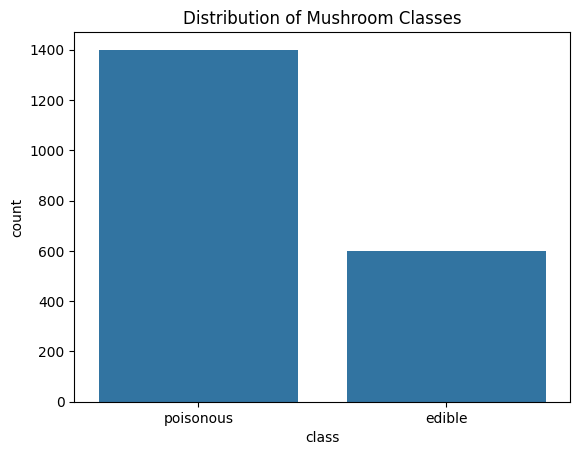

In [18]:
print("\nClass Distribution:")
sns.countplot(x='class', data=df) # Assuming the target column is named 'class'
plt.title("Distribution of Mushroom Classes")
plt.show()

In [19]:
# For a quick look at feature distribution, we can display value counts of one feature
print("\nFeature 'cap_shape' distribution:")
print(df['cap_shape'].value_counts())


Feature 'cap_shape' distribution:
cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64


In [20]:
# Step 3: Data preprocessing
# Copy the dataset to avoid modifying the original
df_encoded = df.copy()

In [21]:
# Encode each categorical column using LabelEncoder
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
print("\nEncoded Dataset Head:")
print(df_encoded.head())


Encoded Dataset Head:
   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6     

In [22]:
# Step 4: Splitting the dataset
# Assume the target variable is 'class'
x = df_encoded.drop('class', axis=1)
y = df_encoded['class']

In [23]:
# Split the dataset into training 80% and testing 20% sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
print("\nTraining set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])


Training set size: 1600
Testing set size: 400


In [25]:
# Step 5:SVM implementation
# Initialize the SVM classifier
svm_model = SVC(random_state=42)

In [26]:
# Train the model on the training data
svm_model.fit(x_train, y_train)

SVC(random_state=42)

In [27]:
# Tredict the classes on the testing set
y_pred = svm_model.predict(x_test)

In [28]:
# Step 6: Model Evaluation
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of SVM model:", accuracy)


Accuracy of SVM model: 0.6675


In [29]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


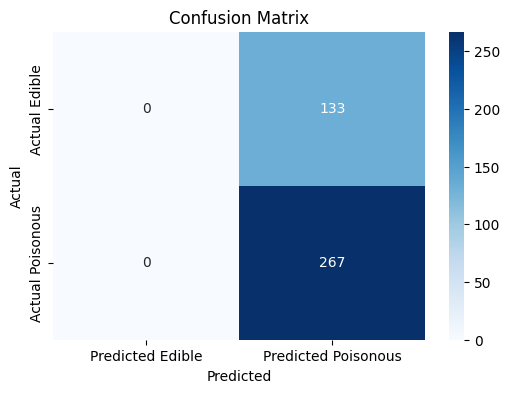

In [30]:
# Confusion matrix and visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual Edible', 'Actual Poisonous'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [31]:
# Step 7: Parameter tuning and kernel comparison
# Define a parameter grid for tuning
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}

In [ ]:
# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Display the best parameters and best score from grid search
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best estimator on the testing set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
print("\nTest Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
